# Generate training batches for VQ-VAE

In [1]:
import os
import sys
import time
import h5py
import numpy as np
from datetime import datetime, timedelta

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

## Main script

In [ ]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...]

In [20]:
year = 2023
BATCH_dir = '/glade/campaign/cisl/aiml/ksha/BATCH_MRMS_025/'

N_hour = 3
size_x = 128 # patch size: 128-by-256
size_y = 256

x_mrms = 105; y_mrms = 242 # 0.1 deg MRMS size
grid_shape = (x_mrms, y_mrms) # the size of 0.1 deg MRMS

N_rain_thres = 200 # each patch must have 1600 raining grid cells
V_rain_thres = 0.1 # 0.1 mm/3h means rain

In [7]:
with h5py.File('/glade/campaign/cisl/aiml/ksha/GFS/MRMS_01H_y{}_025.hdf'.format(year), 'r') as h5io:
    MRMS = h5io['MRMS'][...]

L = len(MRMS) - N_hour # number of available time dimensions

In [23]:
batch_name = 'MRMS_y{}_day{:04d}.npy'
mrms_save = np.zeros((size_x, size_y))

for i in range(L):
    mrms = np.zeros(grid_shape)
    for j in range(N_hour):
        mrms += MRMS[i+j]
        
    # if MRMS has no NaNs
    if np.sum(np.isnan(mrms)) == 0:
        mrms_save[...] = 0.0
        mrms_save[0:x_mrms, 0:y_mrms] = mrms
        
        # if the patch contains enough raining grid cells
        if np.sum(mrms_save > V_rain_thres) > N_rain_thres:

            # if the patch doesn't have NaNs 
            if np.sum(np.isnan(mrms_save)) == 0:

                save_name = BATCH_dir+batch_name.format(year, i)
                #print(save_name)
                np.save(save_name, mrms_save)

### Check batch quality

In [21]:
temp = np.load('/glade/campaign/cisl/aiml/ksha/BATCH_MRMS_025/MRMS_y2023_day4694.npy')

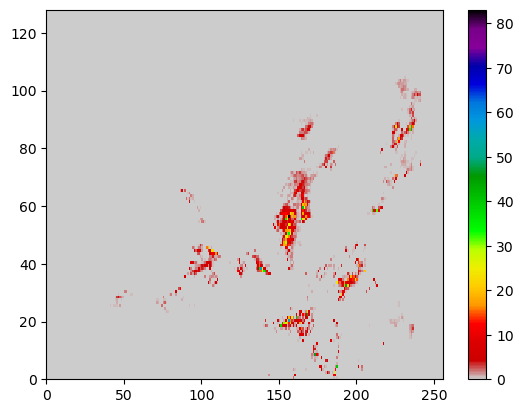

In [22]:
plt.figure()
plt.pcolormesh(temp, cmap=plt.cm.nipy_spectral_r)
plt.colorbar()